# Сборный проект. Интернет-магазин компьютерных игр "Стримчик"


**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Цель работы:** Выявить определяющие успешность игры закономерности на основе исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформах.

**Ход исследования**

1. Изучение общей информации
2. Предобработка данных
3. Исследовательский анализ 
4. Портрет пользователя каждого региона
5. Проверка гипотез
6. Общий вывод


---

**Импорт библиотек:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from scipy import stats as st

## Общая информация


Загружаем и изучаем данные.

In [2]:
games_data = pd.read_csv('/datasets/games.csv')
games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На первый взгляд, видим много пропусков. 

In [3]:
games_data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [4]:
#Посмотрим доли пропусков
games_data.isna().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

- В 3 столбцах примерно 50% пропущенных значений, это много.

- Пропуски в year_of_release некорректно удалять, так как замена их медианой, средним значением или 0 значительно может исказить данные. Поэтому оставим, как есть. 

- Пропуски в Critic_Score и User_Score можно заменить на -1, чтобы не перепутать с Nan и 0.  

## Предобработка данных

**Приведем к нижнему регистру названия столбцов.**


In [5]:
games_data.rename(columns=str.lower, inplace = True)
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


___

**Изменение типа данных**

In [6]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


user_score - нужно заменить тип на float, так как численный показатель.

Проверим уникальные значения по этому столбцу

In [7]:
games_data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)


Присутствуют пропуски, также есть значения 'tbd'. Проверим, сколько их

In [8]:
games_data[games_data['user_score'] == 'tbd']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


'tbd' - To Be Determined
Значение, которым указывается возможное недостаточное количество отзывов и непопулярность игры. 
По сути, оно является Nan, так что заменим на -1, чтобы не перепутать с 0. При дальнейшей работе нужно помнить о них. Также поменяем тип на числовой.

In [9]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)
games_data['user_score'] = games_data['user_score'].astype('float')

In [10]:

games_data['critic_score'] = games_data['critic_score'].fillna(-1)
games_data['user_score'] = games_data['user_score'].fillna(-1)

___

**Обработка пропусков**

In [11]:
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

2 пропуска некритичны в name и genre, сразу заполним 0.

In [12]:
games_data['name'] = games_data['name'].fillna(0)
games_data['genre'] = games_data['genre'].fillna(0)
games_data.isna().sum()


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

**Суммарные продажи во всех регионах в отдельном столбце**

In [13]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN,28.31


На первый взгляд, видно, какие платформы наиболее популярны.

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

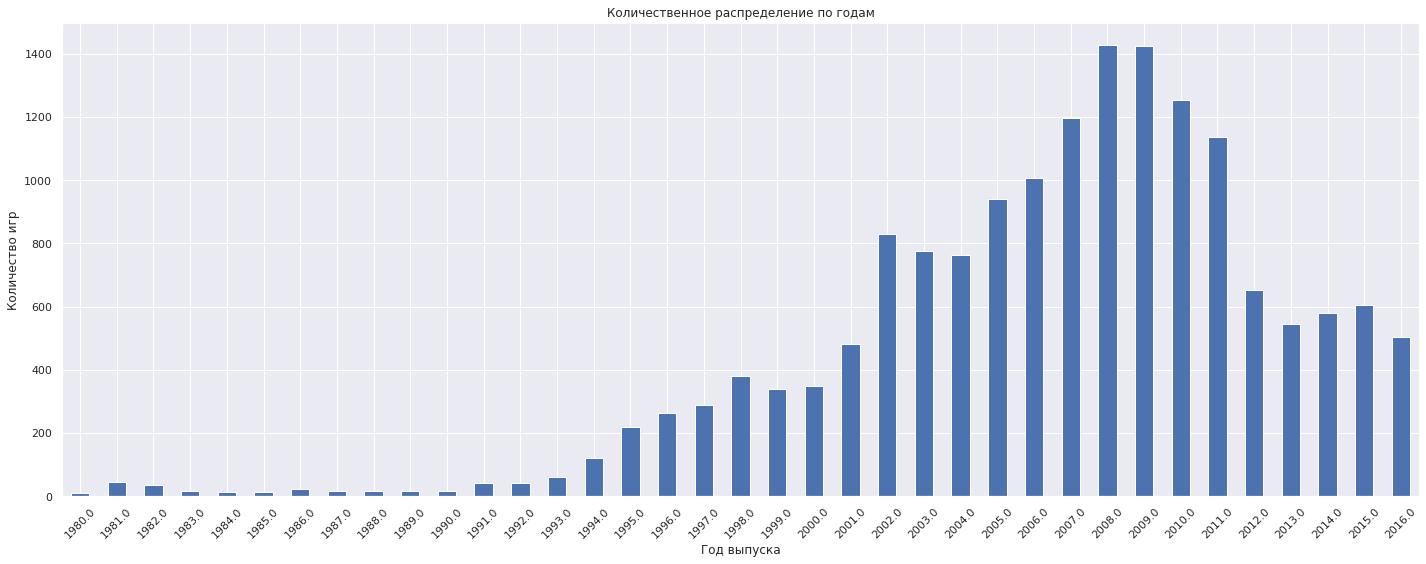

In [14]:
def count_on_year():
    sns.set()
    plt.figure(figsize=(20, 8))  
    (games_data['year_of_release']
     .value_counts()
     .sort_index(ascending=True)
     .plot(kind='bar')
     .set(title='Количественное распределение по годам', xlabel='Год выпуска', ylabel='Количество игр')
    );
    plt.xticks(rotation=45)  
    plt.grid(True)  
    plt.tight_layout()  
    
count_on_year()
plt.show()
    

- В 2002 году был резкий скачок по количеству выпущенных игр. 
- Самый пик приходится на 2008-2009 годы. Затем с 2012 года пошел резкий спад. Скорее всего, связано с развитием мобильных устройств и новых технологий.
- Для прогнозирования успешности нужно брать актуальный период, т.к. данные за предыдущие годы давно устарели. Анализ актуального периода даст наиболее верный прогноз. 

---

**Продажи по платформам за все годы.**

In [15]:
platform_sales = games_data.groupby(['year_of_release', 'platform'])[['total_sales']].sum().reset_index()
platform_sales = platform_sales[platform_sales['year_of_release'] > 0]
total_sales_per_platform = platform_sales.groupby('platform')['total_sales'].sum().reset_index() 
total_sales_per_platform.sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


**Топ 6 популярных платформ.**


In [16]:
#посмотрим 6 самых популярных платформ 
top_platforms = total_sales_per_platform.nlargest(6, 'total_sales')['platform']

top_platforms_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]


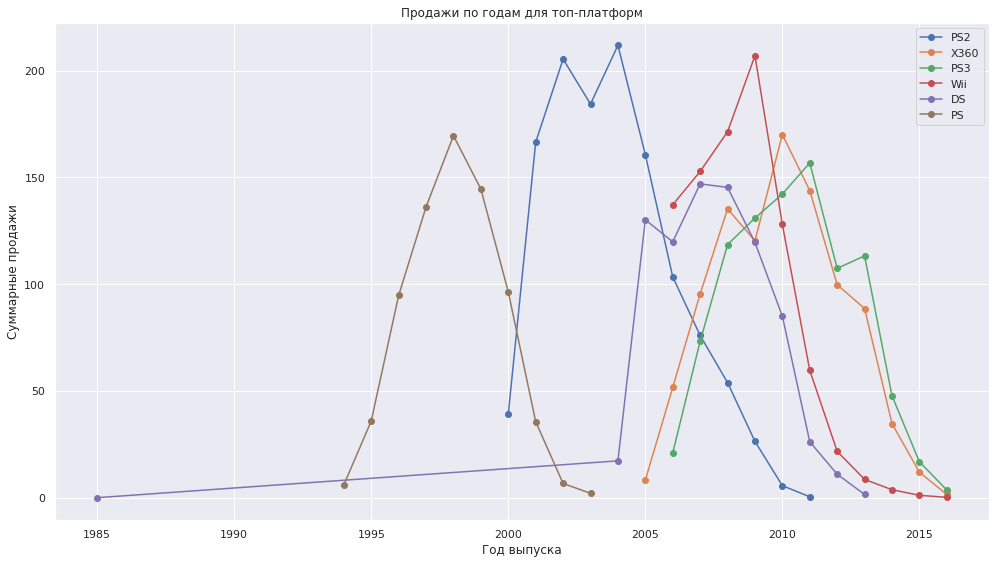

In [17]:
plt.figure(figsize=(14, 8))

for platform in top_platforms:
    platform_data = top_platforms_sales[top_platforms_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform, marker='o', linestyle='-')

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Продажи по годам для топ-платформ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Новые платформы только набирают обороты, а старые уже изжили себя.


---

**Вычисление срока жизни платформы.**

In [18]:
new_platforms = platform_sales.groupby('platform')['year_of_release'].min().reset_index()
new_platforms.columns = ['platform', 'release']

last_platforms = platform_sales.groupby('platform')['year_of_release'].max().reset_index()
last_platforms.columns = ['platform', 'end_of_release']

platform_lifespan = pd.merge(new_platforms, last_platforms, on='platform')

platform_lifespan['lifespan'] = platform_lifespan['end_of_release'] - platform_lifespan['release']
platform_lifespan['lifespan'].mean()


7.612903225806452

Средний срок жизни платформы примерно 7 лет.

---

**Выявление актуального периода для прогноза игр на 2017 год.** 

Актуальным периодом возьму 2 года, так как тренды сменяются быстро.

In [19]:
filtered_data = games_data[(games_data['year_of_release'] >= 2014) & (games_data['year_of_release'] <= 2016)]
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().reset_index()
top_platforms = platform_sales.sort_values(by='total_sales', ascending=False).head(6)['platform'].tolist()
top_platforms

['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU']

In [20]:
actual_period = filtered_data[filtered_data['platform'].isin(top_platforms)]

actual_period = actual_period.sort_values(by='total_sales', ascending=False)

actual_period

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16228,Big Hero 6: Battle in the Bay,3DS,2014.0,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN,0.01
16188,Darksiders: Warmastered Edition,XOne,2016.0,Action,0.01,0.00,0.00,0.00,80.0,7.9,M,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016.0,Misc,0.01,0.00,0.00,0.00,-1.0,-1.0,T,0.01


Посмотрим продажи за актуальный период.

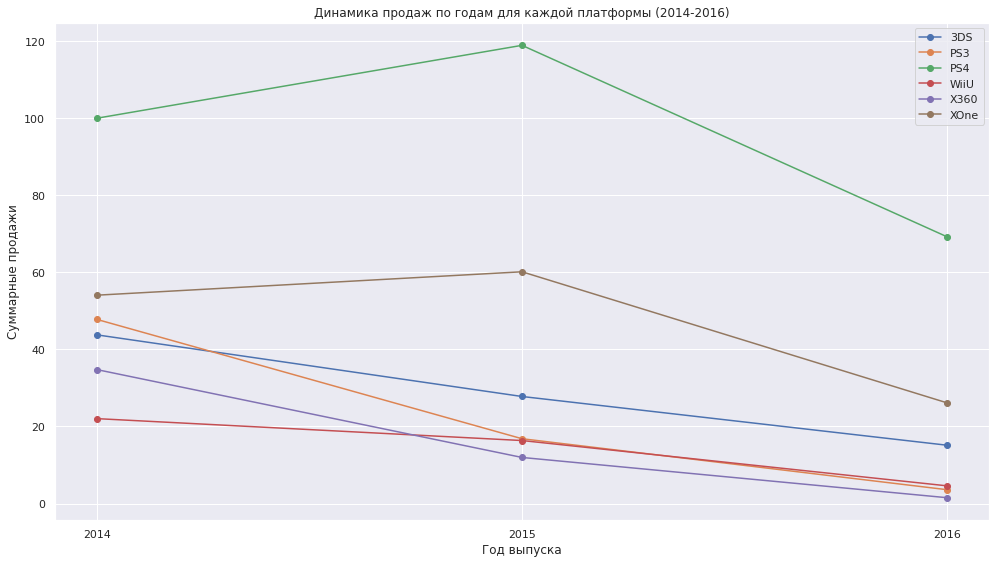

In [21]:
actual_period_fig = actual_period.groupby(['year_of_release', 'platform'])[['total_sales']].sum().reset_index()
plt.figure(figsize=(14, 8))

for platform in actual_period_fig['platform'].unique():
    platform_fig = actual_period_fig[actual_period_fig['platform'] == platform]
    plt.plot(platform_fig['year_of_release'], platform_fig['total_sales'], label=platform, marker='o', linestyle='-')

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Динамика продаж по годам для каждой платформы (2014-2016)')
plt.legend()
plt.grid(True)
plt.xticks(range(2014, 2017))
plt.tight_layout()
plt.show()

Есть тенденция к снижению продаж за актуальный период по всем популярным платформам.

___

**"Ящик с усами" по глобальным продажам игр в разбивке по платформам**

In [22]:
top6_median = actual_period.groupby('platform')['total_sales'].agg(['sum', 'median'])
top6_median.sort_values(by='median', ascending=False)

,sum,median
platform,,
XOne,140.36,0.205
WiiU,42.98,0.190
PS4,288.15,0.185
X360,48.22,0.180
PS3,68.18,0.110
3DS,86.68,0.090


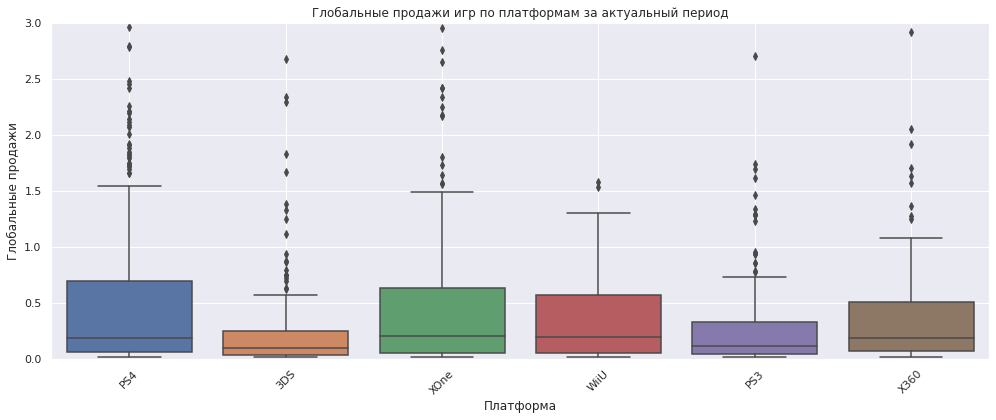

In [23]:
plt.figure(figsize=(14,6))
sns.boxplot(x='platform', y='total_sales', data=actual_period)
plt.ylim(0, 3)

plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.title('Глобальные продажи игр по платформам за актуальный период')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


    Медианные продажи актуальных топовых платформ варьируется от 0.090 до 0.205 млн проданных копий.

    Самым прибыльным по медиане оказался XOne.  
    PS4 с максимальной суммарной продажей на третьем месте по медиане.

---

**Влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков?**

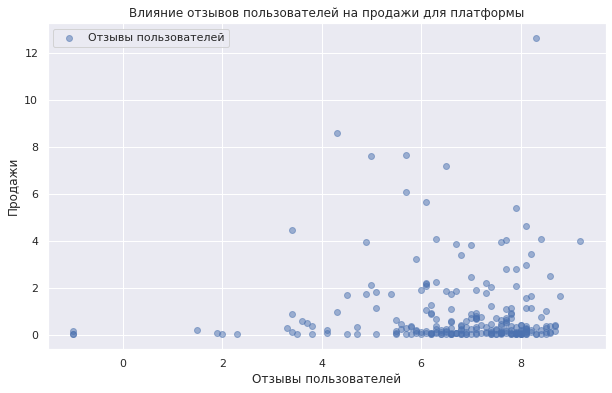

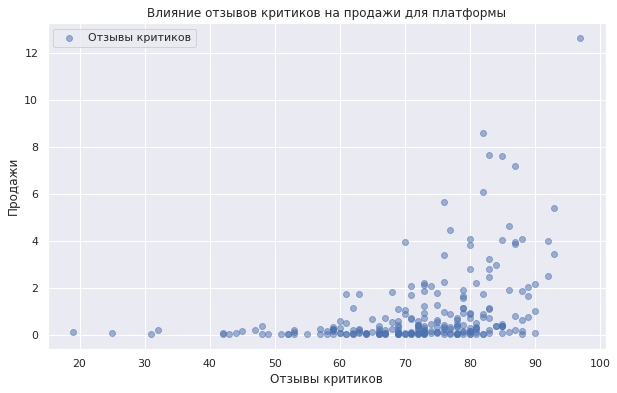

In [24]:
#фильтрация данных для выбранной платформы
platform_ps4 = actual_period[(actual_period['platform'] == 'PS4') & (actual_period['critic_score'] > 0)]


plt.figure(figsize=(10, 6))
plt.scatter(platform_ps4['user_score'], platform_ps4['total_sales'], alpha=0.5, label='Отзывы пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.title(f'Влияние отзывов пользователей на продажи для платформы')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(platform_ps4['critic_score'], platform_ps4['total_sales'], alpha=0.5, label='Отзывы критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.title(f'Влияние отзывов критиков на продажи для платформы')
plt.legend()
plt.grid(True)
plt.show()

user_score_correlation = platform_ps4['user_score'].corr(platform_ps4['total_sales'])

critic_score_correlation = platform_ps4['critic_score'].corr(platform_ps4['total_sales'])



Тем выше оценка критиков и пользователей, тем успешнее игра. В отзывах пользователей больше выбросов. 

<AxesSubplot:>

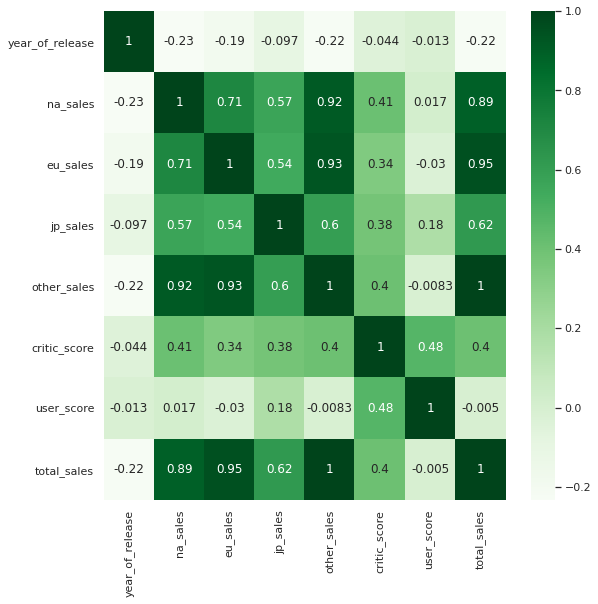

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(platform_ps4.corr(), annot=True, cmap="Greens")

    Корреляция отзывов юзеров и критиков положительная. Наибольшее влияние имеет оценка критиков.

Посмотрим, как на других платформах.


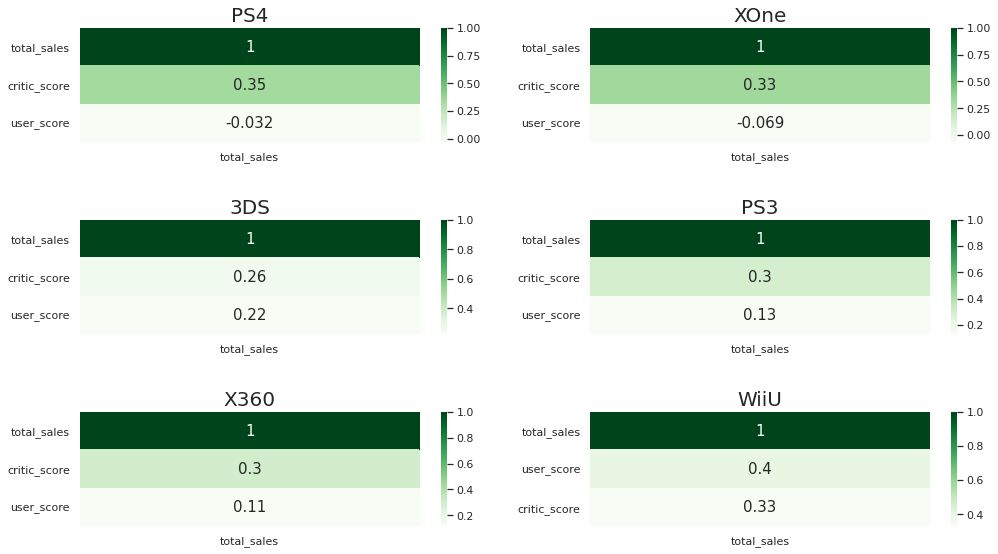

In [26]:
rows = (len(top_platforms) + 1) // 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 8.5))

count = 0

for r in range(rows):
    for c in range(cols):
        if count < len(top_platforms ):
            curr_platform = top_platforms [count]
            df_prep = games_data[(games_data['platform'] == curr_platform) & (games_data['user_score'] > 0)].copy()

            df_filtered = df_prep[['total_sales', 'critic_score', 'user_score']]
            sns.set(font_scale=1.0)
            ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False),
                             cmap="Greens", annot=True, annot_kws={'size': 15}, ax=axes[r, c])
            ax.set_title(curr_platform, fontsize=20)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
            count += 1

if count < rows * cols:
    for i in range(count, rows * cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout(pad=3)

plt.show()

Отзывы юзеров и критиков также влияют на продажи других топовых платформ. Больше всего влияние отзывов на WiiU.

Оценки юзеров не влияют на продажи у PS4 и XOne. Возможно из-за того, что они довольно новые и отзывов мало.

---

**Общее распределение игр по жанрам**

In [27]:
genre_sales = actual_period.groupby('genre')['total_sales'].agg(['sum', 'median'])

genre_sales.sort_values(by='median', ascending=False)

,sum,median
genre,,
Shooter,164.51,0.680
Sports,106.70,0.315
Role-Playing,90.47,0.170
Platform,17.84,0.160
Fighting,27.43,0.150
Racing,26.78,0.130
Simulation,6.49,0.120
Action,185.16,0.120
Misc,30.91,0.110


- Есть смысл посмотреть именно медианные продажи, т.к. один жанр может провалиться на другой платформе. Нам важно смотреть на более стабильные платформы и на их основе строить прогнозы, учитывая актуальный период.
- Самым прибыльным оказался жанр **Shooter.**
- Следующие прибыльные жанры, если смотреть по медианным продажам: **Sports, Platform**

## Портрет пользователя каждого региона


**Топ-5 самых популярных платформ по регионам**

In [28]:
na_platform = actual_period.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
eu_platform = actual_period.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
jp_platform = actual_period.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()


In [29]:
top5_na_platform = na_platform[:5]
top5_eu_platform = eu_platform[:5]
top5_jp_platform = jp_platform[:5]

top5_na_platform = top5_na_platform.append({'platform': 'Other', 'na_sales': na_platform['na_sales'].sum() - na_platform['na_sales'][:5].sum()}, ignore_index = True)
top5_eu_platform = top5_eu_platform.append({'platform': 'Other', 'eu_sales': eu_platform['eu_sales'].sum() - eu_platform['eu_sales'][:5].sum()}, ignore_index = True)
top5_jp_platform = top5_jp_platform.append({'platform': 'Other', 'jp_sales': jp_platform['jp_sales'].sum() - jp_platform['jp_sales'][:5].sum()}, ignore_index = True)


In [30]:
top5_eu_platform

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,3DS,16.12
4,X360,15.49
5,Other,13.15


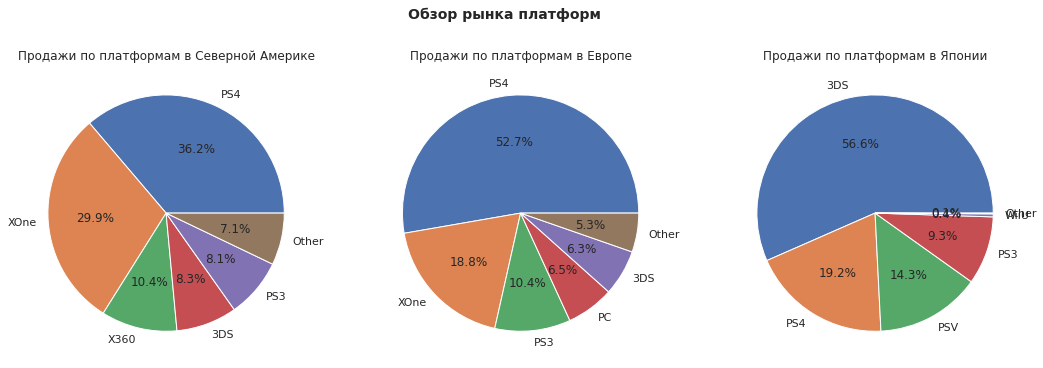

In [31]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Обзор рынка платформ', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=top5_na_platform['na_sales']
plt.pie(vals, labels = ['PS4', 'XOne', 'X360', '3DS', 'PS3', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по платформам в Северной Америке")

plt.subplot(1, 3, 2)
vals=top5_eu_platform['eu_sales']
plt.pie(vals, labels = ['PS4', 'XOne', 'PS3', 'PC', '3DS', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по платформам в Европе")

plt.subplot(1, 3, 3)
vals=top5_jp_platform['jp_sales']
plt.pie(vals, labels = ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по платформам в Японии")


plt.show()


- В Северной Америке самые популярные платформы - PS4 и XOne.
- В Европе топ: PS4 и XOne.
- В Японии лидирует 3DS с большим отрывом, на втором месте - PS4.

**Топ-5 самых популярных жанров по регионам**

In [32]:
genres_na = actual_period.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False).reset_index()
genres_eu = actual_period.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False).reset_index()
genres_jp = actual_period.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False).reset_index()


In [33]:
top5_genres_na = genres_na[:5]
top5_genres_eu = genres_eu[:5]
top5_genres_jp = genres_jp[:5]
top5_genres_na

,genre,na_sales
0,Shooter,76.83
1,Action,69.83
2,Sports,45.71
3,Role-Playing,31.14
4,Misc,13.15


In [34]:
top5_genres_na = top5_genres_na.append({'genre': 'Other', 'na_sales': genres_na['na_sales'].sum() - genres_na['na_sales'][:5].sum()}, ignore_index = True)
top5_genres_eu = top5_genres_eu.append({'genre': 'Other', 'eu_sales': genres_eu['eu_sales'].sum() - genres_eu['eu_sales'][:5].sum()}, ignore_index = True)
top5_genres_jp = top5_genres_jp.append({'genre': 'Other', 'jp_sales': genres_jp['jp_sales'].sum() - genres_jp['jp_sales'][:5].sum()}, ignore_index = True)

top5_genres_jp



,genre,jp_sales
0,Role-Playing,26.47
1,Action,24.48
2,Fighting,5.91
3,Shooter,4.86
4,Misc,3.74
5,Other,12.73


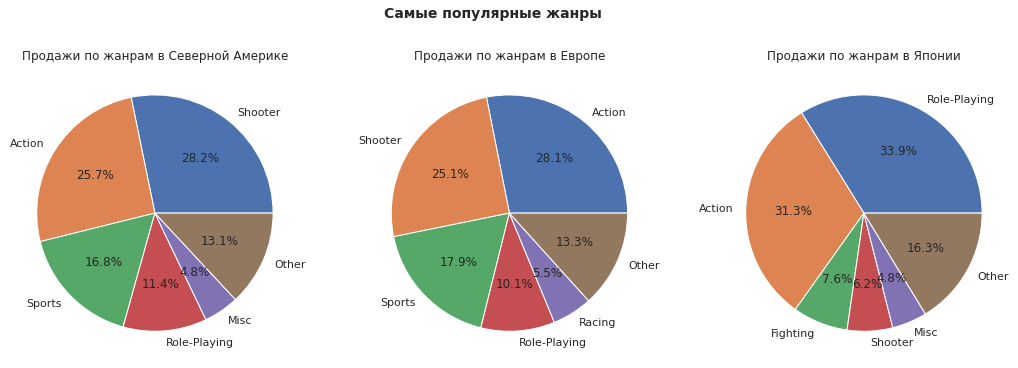

In [35]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Самые популярные жанры', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=top5_genres_na['na_sales']
plt.pie(vals, labels = ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по жанрам в Северной Америке")

plt.subplot(1, 3, 2)
vals=top5_genres_eu['eu_sales']
plt.pie(vals, labels = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по жанрам в Европе")

plt.subplot(1, 3, 3)
vals=top5_genres_jp['jp_sales']
plt.pie(vals, labels = ['Role-Playing', 'Action', 'Fighting',  'Shooter', 'Misc', 'Other'], autopct='%1.1f%%'); 
plt.title("Продажи по жанрам в Японии")


plt.show()


- В Северной Америке самые популярные жанры - Action и Shooter, на третьем месте - Sports.

- В Европе топ такой же.
- В Японии лидируют Action и Role-Playing.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [36]:
games_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [37]:
# создаем словарь с расшифровкой
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}


In [38]:
games_data['ESRB_description'] = games_data[games_data['rating'].notna()]['rating'].map(ESRB_dict)


In [39]:
games_data['ESRB_description'].unique()


array(['Для всех', nan, '> 17 лет', '13-19 лет', '>10 лет',
       'Для всех(устар.)'], dtype=object)

In [40]:
na_esrb = games_data.groupby('ESRB_description')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
eu_esrb = games_data.groupby('ESRB_description')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
jp_esrb = games_data.groupby('ESRB_description')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_esrb

,ESRB_description,jp_sales
3,Для всех,198.11
0,13-19 лет,151.40
1,> 17 лет,64.24
2,>10 лет,40.20
4,Для всех(устар.),1.46


Text(0.5, 1.0, 'Продажи в Японии')

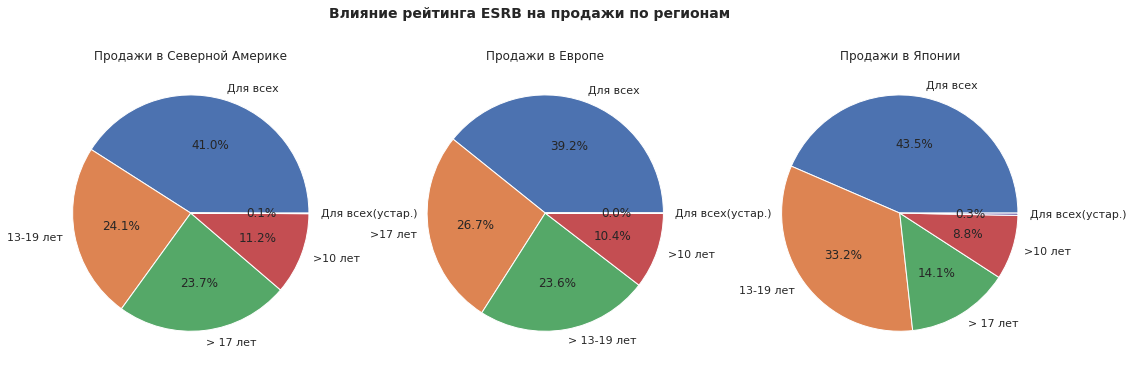

In [41]:
f, ax = plt.subplots(1, 3)
f.set_size_inches(18, 6)
f.suptitle('Влияние рейтинга ESRB на продажи по регионам', fontsize=14, fontweight='bold');

plt.subplot(1, 3, 1)
vals=na_esrb['na_sales']
plt.pie(vals, labels = ['Для всех', '13-19 лет', '> 17 лет', '>10 лет', 'Для всех(устар.)'], autopct='%1.1f%%'); 
plt.title("Продажи в Северной Америке")

plt.subplot(1, 3, 2)
vals=eu_esrb['eu_sales']
plt.pie(vals, labels = ['Для всех', '>17 лет', '> 13-19 лет', '>10 лет', 'Для всех(устар.)'], autopct='%1.1f%%'); 
plt.title("Продажи в Европе")

plt.subplot(1, 3, 3)
vals=jp_esrb['jp_sales']
plt.pie(vals, labels = ['Для всех', '13-19 лет', '> 17 лет', '>10 лет', 'Для всех(устар.)'], autopct='%1.1f%%'); 
plt.title("Продажи в Японии")

- Большую выручку приносят игры с рейтингом "Для всех" по всем регионам. 
- Категория людей от 17 лет и 13-19 лет также остаются актуальными. 

## Проверка гипотез


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha = 0.05

Что делаем:
- сперва определяем выборку;
- формулируем нулевую и альтернативную гипотезы;
- находим среднее для каждой выборки;
- выбираем уровень статистической значимости (в нашем случае 0.05);
- строим выборочное распределение выборочного среднего, нулевая гипотеза служит математическим ожиданием;
- находим вероятность получить наблюдаемое значение - pvalue;
- сравниваем полученное p-value и выбранный уровень статистической значимости;
- по результату отвергаем или не отвергаем нулевую гипотезу.

Для обеих гипотез  применим двухвыборочный t-тест для независимых выборок, так как они не связаны между собой.


**Гипотеза №1**. 

Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.


In [42]:
xone_rating = games_data[(games_data['platform'] == 'XOne') & (games_data['user_score'] > 0)]['user_score']
pc_rating = games_data[(games_data['platform'] == 'PC') & (games_data['user_score'] > 0)]['user_score']

print(f'средняя оценка пользователей Xbox One: {np.mean(xone_rating)}')
print(f'средняя оценка пользователей PC: {np.mean(pc_rating)}')

alpha = 0.05
results = st.ttest_ind(
    xone_rating,
    pc_rating)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

средняя оценка пользователей Xbox One: 6.521428571428572
средняя оценка пользователей PC: 7.062467532467533
p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Средняя оценка пользователей ПК выше, чем на Xbox One. 

**Гипотеза №2**. 

Н0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 - Средние пользовательские рейтинги жанров Action и Sports отличаются.



In [43]:
action_genre = games_data[(games_data['genre'] == 'Action') & (games_data['user_score'] > 0)]['user_score']
sports_genre = games_data[(games_data['genre'] == 'Sports') & (games_data['user_score'] > 0)]['user_score']

print(f'средняя оценка пользователей жанра Action: {np.mean(action_genre)}')
print(f'средняя оценка пользователей жанра Sports: {np.mean(sports_genre)}')

alpha = 0.05
results = st.ttest_ind(
    action_genre,
    sports_genre)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

средняя оценка пользователей жанра Action: 7.054043715846995
средняя оценка пользователей жанра Sports: 6.961196736174069
p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Значит, средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод


В данных выявлено много пропусков в годах выпуска, оценках пользователей и критиков.
Пропуски в годах релиза не стала заменять, потому что при замене дальнейшее исследование может оказаться недостоверным. 
Пропуски в user_score и critic_score заменены на -1, чтобы не было путаницы с 0 и Nan.  

В целом, есть тенденция к снижению производства и продаж за последние годы по всем платформам. Связано это с развитием новых технологий и мобильных игр. 

- Срок жизни платформы - 7лет. 
- Для прогнозирования 2017 года взят актуальный период с 2014 года (2 года), так как тренды меняются с каждым годом все чаще и быстрее. Если мы хотим достоверный прогноз, лучше брать не больше 2 лет.


**При исследовательском анализе выявлено:** 
- Оценки критиков влияют на продажи больше, чем оценки пользователей. Важно учитывать это при прогнозе и улучшать процессы в эту сторону.
- Самой прибыльной платформой по медиане оказалась XOne.
- Самый прибыльный жанр - Shooter.
- Из топовых платформ большинство уже изжили себя, а новые только набирают обороты. 

**Топ платформ по регионам:**
- В Северной Америке самые популярные платформы - PS4 и XOne.
- В Европе топ: PS4 и XOne.
- В Японии лидирует 3DS с большим отрывом, на втором месте - PS4.

**Популярные жанры:**
- В Северной Америке самые популярные жанры - Action и Shooter, на третьем месте - Sports.

- В Европе топ такой же.
- В Японии лидируют Action и Role-Playing.

Рейтинг ESRB игр "Для всех" является самым востребованным.

По гипотезам: 
- Средняя оценка пользователей ПК выше, чем на Xbox One. 
- Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Эти виды игр наиболее востребованы среди пользователей, поэтому тенденция к произведению игр с самыми популярными жанрами будет только расти, ведь конкуренция и мир не стоят на месте. И если можно потратить миллионы денег на маркетинг, решающим фактором успешности игры будет выступать баланс качества игры, скорости, сложности, юмора и прочих важных деталей. Также важно учитывать стоимость различных жанров, которые заметно могут отличаться. 

